<a href="https://colab.research.google.com/github/ashokmuruga/AIMLDL/blob/master/wipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 16.7 MB 42.2 MB/s 
     |████████████████████████████████| 6.3 MB 35.4 MB/s 


+-------+-----------+-----------+-----------+----------+
| Sr.No | States/UT | Confirmed | Recovered | Deceased |
+-------+-----------+-----------+-----------+----------+
|       |   Total   |     0     |     0     |    0     |
+-------+-----------+-----------+-----------+----------+


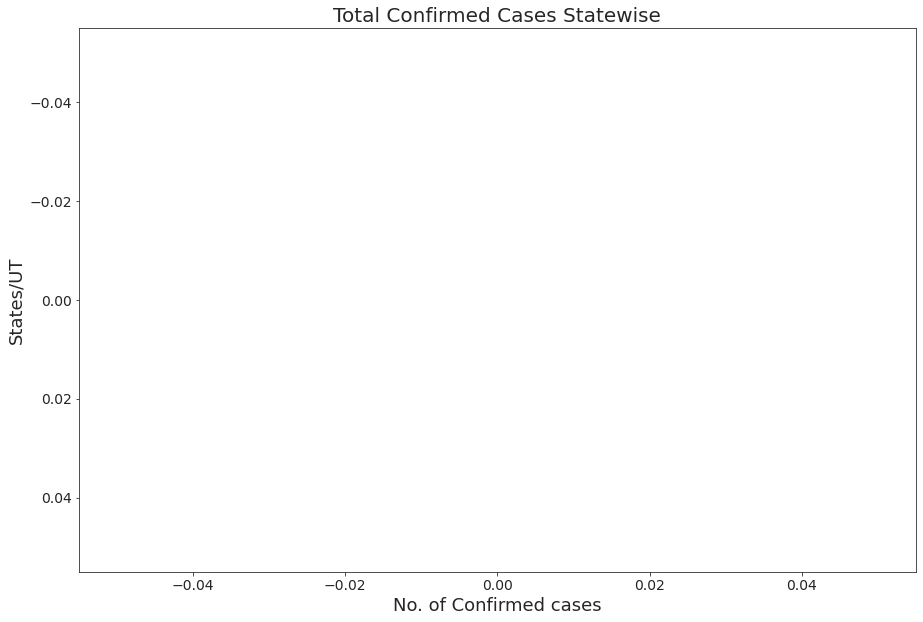

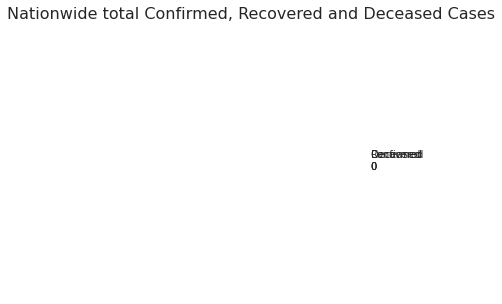

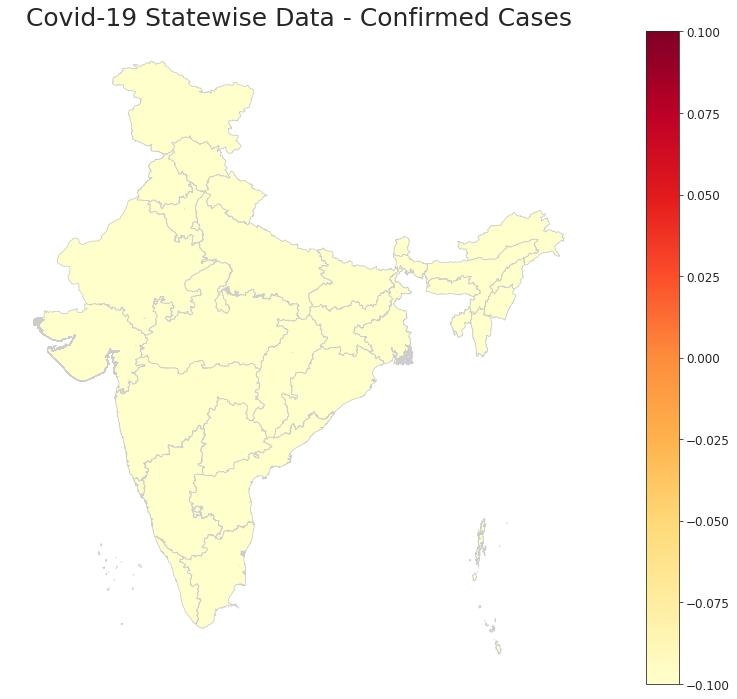

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

In [ ]:
!pip install streamlit

     |████████████████████████████████| 9.7 MB 5.2 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 48.5 MB/s 
     |████████████████████████████████| 180 kB 47.9 MB/s 
     |████████████████████████████████| 164 kB 53.4 MB/s 
     |████████████████████████████████| 4.3 MB 56.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 128 kB 59.9 MB/s 
     |████████████████████████████████| 792 kB 56.5 MB/s 
     |████████████████████████████████| 375 kB 49.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=3875f4a1e3b459e9a8a330c1ccb66146a20859de538baa60925eaac2b6a1a4c7
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import requests
from datetime import datetime

In [ ]:
raw= requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
raw_json = raw.json()
df = pd.DataFrame(raw_json["features"])

In [ ]:
df.head()

,attributes,geometry
0,"{'OBJECTID': 1, 'Province_State': None, 'Count...","{'x': 67.70995300000004, 'y': 33.93911000000003}"
1,"{'OBJECTID': 2, 'Province_State': None, 'Count...","{'x': 20.168300000000045, 'y': 41.15330000000006}"
2,"{'OBJECTID': 3, 'Province_State': None, 'Count...","{'x': 1.6596000000000686, 'y': 28.033900000000..."
3,"{'OBJECTID': 4, 'Province_State': None, 'Count...","{'x': 1.5218000000000416, 'y': 42.50630000000007}"
4,"{'OBJECTID': 5, 'Province_State': None, 'Count...","{'x': 17.87390000000005, 'y': -11.202699999999..."


In [ ]:
df["attributes"][0]

{'OBJECTID': 1,
 'Province_State': None,
 'Country_Region': 'Afghanistan',
 'Last_Update': 1643786466000,
 'Lat': 33.93911,
 'Long_': 67.709953,
 'Confirmed': 163555,
 'Recovered': 0,
 'Deaths': 7417,
 'Active': 0,
 'Admin2': None,
 'FIPS': None,
 'Combined_Key': 'Afghanistan'}

In [ ]:
data_list = df["attributes"].tolist()
df_final = pd.DataFrame(data_list)
df_final.set_index("OBJECTID")
df_final = df_final[["Country_Region", "Province_State", "Lat", "Long_", "Confirmed", "Deaths", "Recovered", "Last_Update"]]
df_final.head()

,Country_Region,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Last_Update
0,Afghanistan,None,33.93911,67.709953,163555,7417,0,1.643786e+12
1,Albania,None,41.15330,20.168300,258543,3346,0,1.643786e+12
2,Algeria,None,28.03390,1.659600,253520,6593,0,1.643786e+12
3,Andorra,None,42.50630,1.521800,35958,145,0,1.643786e+12
4,Angola,None,-11.20270,17.873900,98226,1895,0,1.643786e+12


In [ ]:
def convertTime(t):
    t = int(t)
    return datetime.fromtimestamp(t)

df_final = df_final.dropna(subset=["Last_Update"])
df_final["Province_State"].fillna(value="", inplace=True)

df_final["Last_Update"]= df_final["Last_Update"]/1000
df_final["Last_Update"] = df_final["Last_Update"].apply(convertTime)

df_final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Country_Region,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Last_Update
0,Afghanistan,,33.93911,67.709953,163555,7417,0,2022-02-02 07:21:06
1,Albania,,41.15330,20.168300,258543,3346,0,2022-02-02 07:21:06
2,Algeria,,28.03390,1.659600,253520,6593,0,2022-02-02 07:21:06
3,Andorra,,42.50630,1.521800,35958,145,0,2022-02-02 07:21:06
4,Angola,,-11.20270,17.873900,98226,1895,0,2022-02-02 07:21:06


In [ ]:
df_total = df_final.groupby("Country_Region", as_index=False).agg(
    {
        "Confirmed" : "sum",
        "Deaths" : "sum",
        "Recovered" : "sum"
    }
)

df_total.head()

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,163555,7417,0
1,Albania,258543,3346,0
2,Algeria,253520,6593,0
3,Andorra,35958,145,0
4,Angola,98226,1895,0


In [ ]:
total_confirmed = df_final["Confirmed"].sum()
total_recovered = df_final["Recovered"].sum()
total_deaths = df_final["Deaths"].sum()

In [ ]:
df_top10 = df_total.nlargest(10, "Confirmed")
top10_countries_1 = df_top10["Country_Region"].tolist()
top10_confirmed = df_top10["Confirmed"].tolist()

df_top10 = df_total.nlargest(10, "Recovered")
top10_countries_2 = df_top10["Country_Region"].tolist()
top10_recovered = df_top10["Recovered"].tolist()

df_top10 = df_total.nlargest(10, "Deaths")
top10_countries_3 = df_top10["Country_Region"].tolist()
top10_deaths = df_top10["Deaths"].tolist()

In [ ]:
fig = make_subplots(
    rows = 4, cols = 6,
    specs=[
            [{"type": "scattergeo", "rowspan": 4, "colspan": 3}, None, None, {"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"} ],
            [    None, None, None,               {"type": "bar", "colspan":3}, None, None],
            [    None, None, None,              {"type": "bar", "colspan":3}, None, None],
            [    None, None, None,               {"type": "bar", "colspan":3}, None, None],
          ]
)

In [ ]:
message = df_final["Country_Region"] + " " + df_final["Province_State"] + "<br>"
message += "Confirmed: " + df_final["Confirmed"].astype(str) + "<br>"
message += "Deaths: " + df_final["Deaths"].astype(str) + "<br>"
message += "Recovered: " + df_final["Recovered"].astype(str) + "<br>"
message += "Last updated: " + df_final["Last_Update"].astype(str)
df_final["text"] = message

In [ ]:
fig.add_trace(
    go.Scattergeo(
        locationmode = "country names",
        lon = df_final["Long_"],
        lat = df_final["Lat"],
        hovertext = df_final["text"],
        showlegend=False,
        marker = dict(
            size = 10,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = df_final['Confirmed'],
            cmax = df_final['Confirmed'].max(),
            colorbar_title="Confirmed Cases<br>Latest Update",  
            colorbar_x = -0.05
        )

    ),
    
    row=1, col=1
)

In [ ]:
fig.add_trace(
    go.Indicator(
        mode="number",
        value=total_confirmed,
        title="Confirmed Cases",
    ),
    row=1, col=4
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=total_recovered,
        title="Recovered Cases",
    ),
    row=1, col=5
)

fig.add_trace(
    go.Indicator(
        mode="number",
        value=total_deaths,
        title="Deaths Cases",
    ),
    row=1, col=6
)

In [ ]:
fig.add_trace(
    go.Bar(
        x=top10_countries_1,
        y=top10_confirmed, 
        name= "Confirmed Cases",
        marker=dict(color="Yellow"), 
        showlegend=True,
    ),
    row=2, col=4
)

fig.add_trace(
    go.Bar(
        x=top10_countries_2,
        y=top10_recovered, 
        name= "Recovered Cases",
        marker=dict(color="Green"), 
        showlegend=True),
    row=3, col=4
)

fig.add_trace(
    go.Bar(
        x=top10_countries_3,
        y=top10_deaths, 
        name= "Deaths Cases",
        marker=dict(color="crimson"), 
        showlegend=True),
    row=4, col=4
)

In [ ]:
fig.update_layout(
    template="plotly_dark",
    title = "Global COVID-19 Cases (Last Updated: " + str(df_final["Last_Update"][0]) + ")",
    showlegend=True,
    legend_orientation="h",
    legend=dict(x=0.65, y=0.8),
    geo = dict(
            projection_type="orthographic",
            showcoastlines=True,
            landcolor="white", 
            showland= True,
            showocean = True,
            lakecolor="LightBlue"
    ),

    annotations=[
        dict(
            text="Source: https://bit.ly/3aEzxjK",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.35,
            y=0)
    ]
)

fig.write_html('first_figure.html', auto_open=True)

In [ ]:
!git clone https://github.com/neoighodaro/pusher-python-realtime-dashboard.git

Cloning into 'pusher-python-realtime-dashboard'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38
Unpacking objects: 100% (38/38), done.


In [ ]:
!cd pusher-python-realtime-dashboard

In [ ]:
!pip install flask

In [ ]:
!pip install pusher

     |████████████████████████████████| 131 kB 13.7 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 856 kB 53.4 MB/s 
     |████████████████████████████████| 3.6 MB 53.7 MB/s 


In [ ]:
!python dbsetup.py

python3: can't open file 'dbsetup.py': [Errno 2] No such file or directory


In [ ]:
!export FLASK_ENV=development

In [ ]:
!flask run /content/pusher-python-realtime-dashboard/app.py

Usage: flask run [OPTIONS]
Try "flask run --help" for help.

Error: Got unexpected extra argument (/content/pusher-python-realtime-dashboard/app.py)


In [ ]:
# Library for opening url and creating
# requests
import urllib.request

# pretty-print python data structures
from pprint import pprint

# for parsing all the tables present
# on the website
from html_table_parser.parser import HTMLTableParser

# for converting the parsed data in a
# pandas dataframe
import pandas as pd


# Opens a website and read its
# binary contents (HTTP Response Body)
def url_get_contents(url):

	# Opens a website and read its
	# binary contents (HTTP Response Body)

	#making request to the website
	req = urllib.request.Request(url=url)
	f = urllib.request.urlopen(req)

	#reading contents of the website
	return f.read()

# defining the html contents of a URL.
xhtml = url_get_contents('https://www.moneycontrol.com/india\
/stockpricequote/refineries/relianceindustries/RI').decode('utf-8')

# Defining the HTMLTableParser object
p = HTMLTableParser()

# feeding the html contents in the
# HTMLTableParser object
p.feed(xhtml)

# Now finally obtaining the data of
# the table required
pprint(p.tables[1])

# converting the parsed data to
# dataframe
print("\n\nPANDAS DATAFRAME\n")
print(pd.DataFrame(p.tables[1]))


[['BUY', 'SELL'],
 ['QTY', 'PRICE', 'PRICE', 'QTY'],
 ['30', '2375.60', '2376.45', '60'],
 ['21', '2375.55', '2376.50', '20'],
 ['26', '2375.40', '2376.60', '18'],
 ['1', '2375.35', '2376.65', '4'],
 ['17', '2375.30', '2376.70', '1'],
 ['48140', 'Total', 'Total', '252680']]


PANDAS DATAFRAME

       0        1        2       3
0    BUY     SELL     None    None
1    QTY    PRICE    PRICE     QTY
2     30  2375.60  2376.45      60
3     21  2375.55  2376.50      20
4     26  2375.40  2376.60      18
5      1  2375.35  2376.65       4
6     17  2375.30  2376.70       1
7  48140    Total    Total  252680


In [ ]:
!pip install --upgrade beautifulsoup4

     |████████████████████████████████| 97 kB 3.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install html_table_parser

     |████████████████████████████████| 81 kB 4.0 MB/s 
  Created wheel for html-table-parser: filename=html_table_parser-0.1.0-py3-none-any.whl size=4645 sha256=b0b7c98402b5c8d30199149c2d08885ee9b0e49e5c27a4085e996acbcfaf1ae3
  Stored in directory: /root/.cache/pip/wheels/8b/db/ba/ffbb0a5dcb78fd955a33d26295a77ced593e712a7d8a4a0dc6
Successfully built html-table-parser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [ ]:
!pip install html-table-parser-python3

In [ ]:
raw= requests.get("https://www.mohfw.gov.in/")
raw_json = raw.json()
df = pd.DataFrame(raw_json["features"])

NameError: ignored

In [ ]:
!pip install pip -U

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install --upgrade beautifulsoup4 html5lib


  Using cached beautifulsoup4-4.10.0-py3-none-any.whl (97 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 0.9999999
    Uninstalling html5lib-0.9999999:
      Successfully uninstalled html5lib-0.9999999
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.4.1
    Uninstalling beautifulsoup4-4.4.1:
      Successfully uninstalled beautifulsoup4-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
html-table-parser 0.1.0 requires beautifulsoup4==4.4.1, but you have beautifulsoup4 4.10.0 which is incompatible.


+-------+-----------+-----------+-----------+----------+
| Sr.No | States/UT | Confirmed | Recovered | Deceased |
+-------+-----------+-----------+-----------+----------+
|       |   Total   |     0     |     0     |    0     |
+-------+-----------+-----------+-----------+----------+


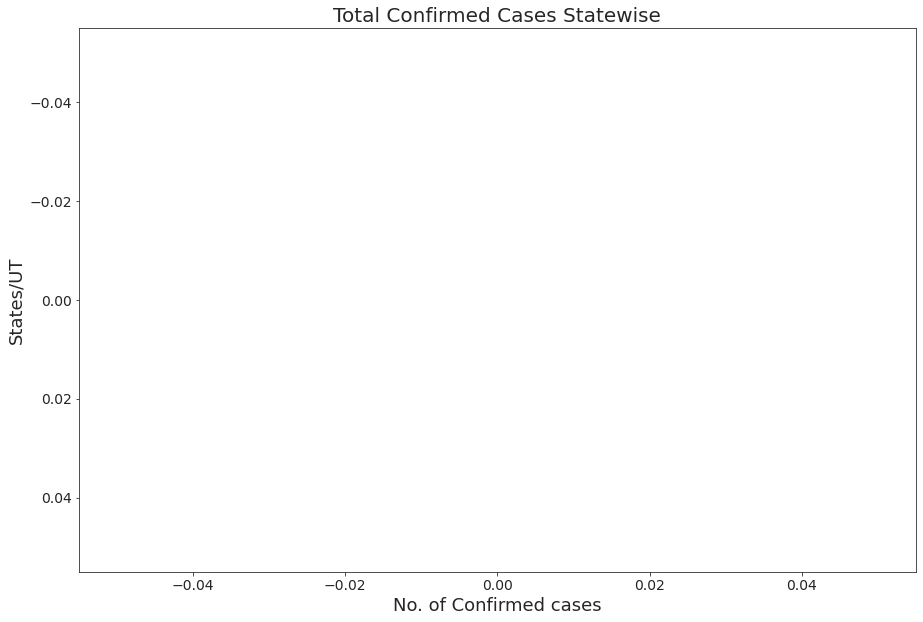

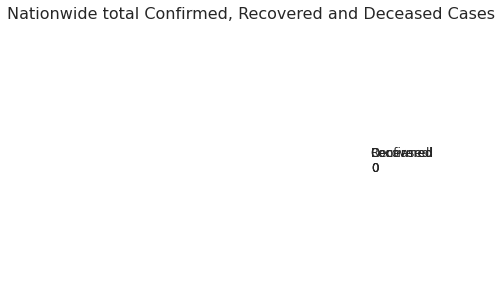

DriverError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
import geopandas as gpd
from prettytable import PrettyTable

# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('/content/Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()

In [ ]:
!pip3 install html5lib==0.9999999

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.3/889.3 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for html5lib: filename=html5lib-0.9999999-py3-none-any.whl size=107234 sha256=f640f10167d5509223d3eff6e8b0d3ecfc41e3c0a8cf016092ff4b259a2a4369
  Stored in directory: /root/.cache/pip/wheels/53/8d/2f/a9d4c8e58cffde4e60ba7f8aac7495de9bc12cffdc2f947723
Successfully built html5lib
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1


In [ ]:
!pip list --outdated --format=freeze

albumentations==0.1.12
beautifulsoup4==4.4.1
blis==0.4.1
bokeh==2.3.3
cachetools==4.2.4
catalogue==1.0.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
contextlib2==0.5.5
coverage==3.7.1
coveralls==0.5
cvxpy==1.0.31
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
distributed==1.25.3
dlib==19.18.0
docutils==0.17.1
dopamine-rl==1.0.5
earthengine-api==0.1.297
editdistance==0.5.3
fastai==1.0.61
firebase-admin==4.4.0
fix-yahoo-finance==0.0.22
Flask==1.1.4
folium==0.8.3
future==0.16.0
gast==0.4.0
GDAL==2.2.2
gensim==3.6.0
geopy==1.17.0
google==2.0.3
google-api-core==1.26.3
google-api-python-client==1.12.10
google-auth==1.35.0
google-auth-httplib2==0.0.4
google-cloud-bigquery==1.21.0
google-cloud-bigquery-storage==1.1.0
google-cloud-core==1.0.3
google-cloud-datastore==1.8.0
google-cloud-firestore==1.7.0
google-cloud-language==1.2.0
google-cloud-storage==1.18.1
google-cloud-translate==1.5.0
google-resumable-media==0.4.1
graphviz==0.10

In [ ]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.6 MB/s eta 0:00:00


In [ ]:
!pip install pyqt5

     |████████████████████████████████| 8.3 MB 6.6 MB/s 
     |████████████████████████████████| 338 kB 69.3 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 


In [ ]:
!pip install PyQt5-tools

     |████████████████████████████████| 69 kB 3.2 MB/s 
     |████████████████████████████████| 8.3 MB 43.8 MB/s 
     |████████████████████████████████| 96.4 MB 69 kB/s 
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.6
    Uninstalling PyQt5-5.15.6:
      Successfully uninstalled PyQt5-5.15.6


In [ ]:
# importing libraries
from PyQt5.QtWidgets import *
from PyQt5 import QtCore, QtGui
from PyQt5.QtGui import *
from PyQt5.QtCore import *
from bs4 import BeautifulSoup
import requests
import sys


class Window(QMainWindow):

	def __init__(self):
		super().__init__()

		# setting title
		self.setWindowTitle("Python ")

		# setting geometry
		self.setGeometry(100, 100, 400, 500)

		# calling method
		self.corona()

		# calling method
		self.UiComponents()

		# showing all the widgets
		self.show()

	def corona(self):
		extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
		URL = 'https://www.mohfw.gov.in/'

		SHORT_HEADERS = ['SNo', 'State', 'Indian-Confirmed',
						'Foreign-Confirmed', 'Cured', 'Death']

		response = requests.get(URL).content
		soup = BeautifulSoup(response, 'html.parser')
		header = extract_contents(soup.tr.find_all('th'))

		self.stats = []
		all_rows = soup.find_all('tr')

		for row in all_rows:
			stat = extract_contents(row.find_all('td'))
			if stat:
				if len(stat) == 5:
					# last row
					stat = ['', *stat]
					self.stats.append(stat)
				elif len(stat) == 6:
					self.stats.append(stat)

		self.stats[-1][1] = "Total Cases"

		self.stats.remove(self.stats[-1])

		# method for widgets
	def UiComponents(self):

		# creating a combo box widget
		self.combo_box = QComboBox(self)

		# setting geometry to combo box
		self.combo_box.setGeometry(100, 50, 200, 40)

		# setting font
		self.combo_box.setFont(QFont('Times', 10))

		# adding items to combo box
		for i in self.stats:

			self.combo_box.addItem(i[2])

		# adding action to the combo box
		self.combo_box.activated.connect(self.get_cases)

		# creating label to show the total cases
		self.label_total = QLabel("Total Cases ", self)

		# setting geometry
		self.label_total.setGeometry(100, 300, 200, 40)

		# setting alignment to the text
		self.label_total.setAlignment(Qt.AlignCenter)

		# adding border to the label
		self.label_total.setStyleSheet("border : 2px solid black;")

		# creating label to show the recovered cases
		self.label_reco = QLabel("Recovered Cases ", self)

		# setting geometry
		self.label_reco.setGeometry(100, 350, 200, 40)

		# setting alignment to the text
		self.label_reco.setAlignment(Qt.AlignCenter)

		# adding border
		self.label_reco.setStyleSheet("border : 2px solid black;")

		# creating label to show death cases
		self.label_death = QLabel("Total Deaths ", self)

		# setting geometry
		self.label_death.setGeometry(100, 400, 200, 40)

		# setting alignment to the text
		self.label_death.setAlignment(Qt.AlignCenter)

		# adding border to the label
		self.label_death.setStyleSheet("border : 2px solid black;")


	# method called by push
	def get_cases(self):

		# getting index
		index = self.combo_box.currentIndex()

		# getting data
		total = self.stats[index][3]
		recovered = self.stats[index][4]
		deaths = self.stats[index][5]

		# show data through labels
		self.label_total.setText("Total Cases : " + total)
		self.label_reco.setText("Recovered Cases : " + recovered)
		self.label_death.setText("Total Deaths : " + deaths)


# create pyqt5 app
App = QApplication(sys.argv)

# create the instance of our Window
window = Window()

window.show()

# start the app
sys.exit(App.exec())


In [ ]:
!git clone https://github.com/RRighart/covid-19.git

Cloning into 'covid-19'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [ ]:
pip install dash_auth

     |████████████████████████████████| 470 kB 5.3 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 7.4 MB 15.1 MB/s 
     |████████████████████████████████| 357 kB 58.7 MB/s 
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476152 sha256=fe4d853495586907384cbf9b519a57eb868a111ef8e6cbd798b7f47d7eedf28c
  Stored in directory: /root/.cache/pip/wheels/19/b2/02/3c3f05988ff92f02c52ce4e081859d423537e8e9b13f673c02
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=ab68ad4b1e30cbb0043f7f51baaea14d46a241bf4476c64a90391a5ff0201c57
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4090 sha256=0c825c47a0efb33a750c5e09f383a7bf8261b79838bc03e4da792341e0b34aa3
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
pip install dash_bootstrap_components

     |████████████████████████████████| 209 kB 5.5 MB/s 


In [ ]:
pip install gunicorn

     |████████████████████████████████| 79 kB 3.7 MB/s 


In [ ]:
!python /content/covid-19/covid-dash-application.py

/usr/local/lib/python3.7/dist-packages/dash_auth/plotly_auth.py:16: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/usr/local/lib/python3.7/dist-packages/dash_auth/plotly_auth.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
TIME1: 2022-02-14 08:01:13.924951
Traceback (most recent call last):
  File "/content/covid-19/covid-dash-application.py", line 96, in <module>
    no_gutters=True,
  File "/usr/local/lib/python3.7/dist-packages/dash/development/base_component.py", line 425, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/dash_bootstrap_components/_components/Row.py", line 76, in __init__
    super(Row, self).__init__(children=children, **args)
  File "/usr/local/lib/pytho